In [1]:
#General script

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import xarray as xr
import cmocean.cm as cmocean
import glob
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.path as mpath
import matplotlib.colors as col
from netCDF4 import Dataset

import xarray as xr
import xesmf as xe

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

from dask.distributed import Client

figdir = '/g/data/e14/pc5520/figures/basal_melt_param/'

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 6
Total threads: 24,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:46423,Workers: 6
Dashboard: /proxy/8787/status,Total threads: 24
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:36011,Total threads: 4
Dashboard: /proxy/38175/status,Memory: 21.33 GiB
Nanny: tcp://127.0.0.1:43073,


In [3]:
di = xr.open_dataset("/home/552/pc5520/MOM6-examples/control/ISOMIP/zco/archive/GPC006/output000/prog__0001_001.nc")
dg = xr.open_dataset("/home/552/pc5520/MOM6-examples/control/ISOMIP/zco//archive/GPC006/output000/ocean_static.nc")

In [4]:
lon = dg.xh
lat = dg.yh

xx = 50
depth = di.e[0,:,:,xx]
data_plot = di.salt[0,:,:,xx]

In [5]:
xx = lat
yy = depth[:-1,:]
z_levels = yy.shape[0]
yi = np.linspace(0,8000,z_levels) #Dummy, just for have z_levels
xi, yyi = np.meshgrid(xx, yi) #We repeat the horizontal part of the grid by the number of zlevels

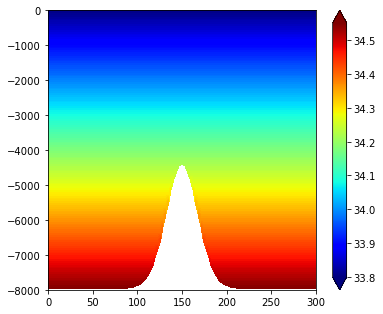

In [6]:
fig  = plt.figure(1, figsize = (6,36))
norm = col.Normalize(vmin=33.8,vmax=34.55)

ax = fig.add_subplot(611)
CS = ax.pcolormesh(xi,yy,data_plot,norm=norm, cmap = cmocean.cm.jet)
plt.ylim(ymin=-8000,ymax=0)
plt.colorbar(CS,orientation = 'vertical',extend = 'both')


In [7]:
du_20 = xr.open_dataset("/home/552/pc5520/MOM6-examples/control/ISOMIP/zco/archive/GPC020/output000/prog__0001_001.nc")
du_21 = xr.open_dataset("/home/552/pc5520/MOM6-examples/control/ISOMIP/zco/archive/GPC021/output000/prog__0001_001.nc")
du_22 = xr.open_dataset("/home/552/pc5520/MOM6-examples/control/ISOMIP/zco/archive/GPC022/output000/prog__0001_001.nc")
du_23 = xr.open_dataset("/home/552/pc5520/MOM6-examples/control/ISOMIP/zco/archive/GPC023/output000/prog__0001_001.nc")

In [8]:
data_plot_20 = du_20.u.max(dim=['xq','yh','zl'])
data_plot_21 = du_21.u.max(dim=['xq','yh','zl'])
data_plot_22 = du_22.u.max(dim=['xq','yh','zl'])
data_plot_23 = du_23.u.max(dim=['xq','yh','zl'])

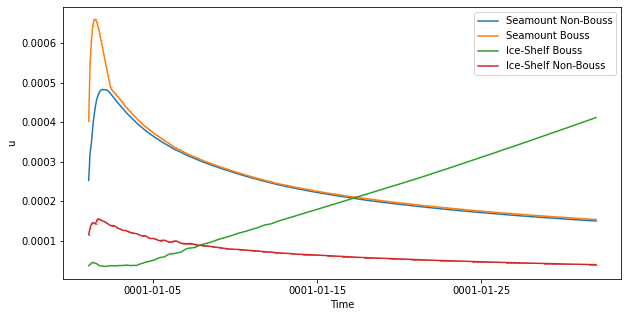

In [9]:
plt.figure(figsize=(10,5))

data_plot_20.plot(label = 'Seamount Non-Bouss')
data_plot_21.plot(label = 'Seamount Bouss', marker='_',markersize=1)
data_plot_22.plot(label = 'Ice-Shelf Bouss ')
data_plot_23.plot(label = 'Ice-Shelf Non-Bouss', marker='_',markersize=1)

plt.legend()

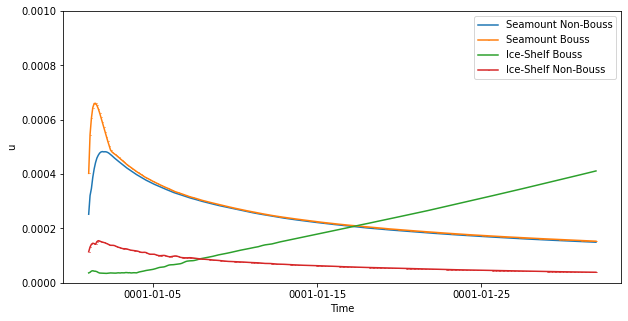

In [10]:
plt.figure(figsize=(10,5))

data_plot_20.plot(label = 'Seamount Non-Bouss')
data_plot_21.plot(label = 'Seamount Bouss', marker='_',markersize=1)
data_plot_22.plot(label = 'Ice-Shelf Bouss ')
data_plot_23.plot(label = 'Ice-Shelf Non-Bouss', marker='_',markersize=1)

plt.ylim(ymin = 0, ymax = 1e-03)
plt.legend()

(-8000.0, 0.0)

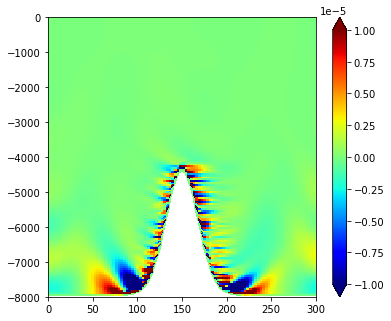

In [14]:
xx = 50
tt = -1
depth = du_21.e[tt,:,:,xx]
data = du_21.u[tt,:,:,xx]

xx = lat
yy = depth[:-1,:]
z_levels = yy.shape[0]
yi = np.linspace(0,8000,z_levels) #Dummy, just for have z_levels
xi, yyi = np.meshgrid(xx, yi) #We repeat the horizontal part of the grid by the number of zlevels

fig  = plt.figure(1, figsize = (6,36))
norm = col.Normalize(vmin=-1e-05,vmax=1e-05)

ax = fig.add_subplot(611)
CS = ax.pcolormesh(xi,yy,data,norm=norm, cmap = cmocean.cm.jet)
plt.colorbar(CS,orientation = 'vertical',extend = 'both')

plt.ylim(ymin=-8000,ymax=0)

(-8000.0, 0.0)

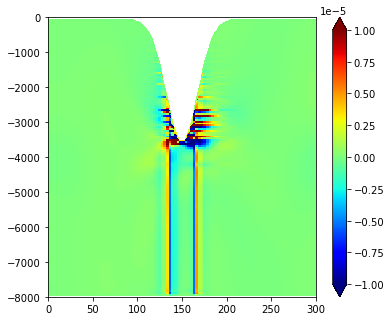

In [13]:
xx = 50
tt = -1
depth = du_22.e[tt,:,:,xx]
data = du_22.u[tt,:,:,xx]

xx = lat
yy = depth[:-1,:]
z_levels = yy.shape[0]
yi = np.linspace(0,8000,z_levels) #Dummy, just for have z_levels
xi, yyi = np.meshgrid(xx, yi) #We repeat the horizontal part of the grid by the number of zlevels

fig  = plt.figure(1, figsize = (6,36))
norm = col.Normalize(vmin=-1e-05,vmax=1e-05)

ax = fig.add_subplot(611)
CS = ax.pcolormesh(xi,yy,data,norm=norm, cmap = cmocean.cm.jet)
plt.colorbar(CS,orientation = 'vertical',extend = 'both')

plt.ylim(ymin=-8000,ymax=0)

(-8000.0, 0.0)

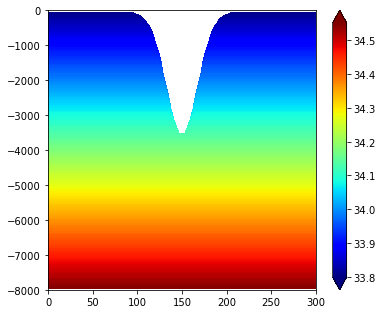

In [22]:
xx = 50
tt = 1
depth = du_10.e[tt,:,:,xx]
data = du_10.salt[tt,:,:,xx]

xx = lat
yy = depth[:-1,:]
z_levels = yy.shape[0]
yi = np.linspace(0,8000,z_levels) #Dummy, just for have z_levels
xi, yyi = np.meshgrid(xx, yi) #We repeat the horizontal part of the grid by the number of zlevels

fig  = plt.figure(1, figsize = (6,36))
norm = col.Normalize(vmin=33.8,vmax=34.55)

ax = fig.add_subplot(611)
CS = ax.pcolormesh(xi,yy,data,norm=norm, cmap = cmocean.cm.jet)
plt.colorbar(CS,orientation = 'vertical',extend = 'both')

plt.ylim(ymin=-8000,ymax=0)

In [24]:
tt = -1
data = du_10.u[tt,:,:,:]
a = np.where(data==data.max())
print('z',a[0],'y',a[1],'x',a[2])

z [40] y [55] x [53]


(-8000.0, 0.0)

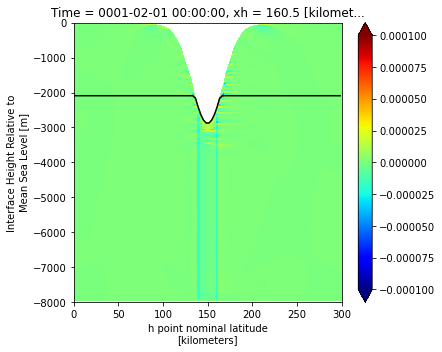

In [27]:
xx = 53
tt = -1
depth = du_10.e[tt,:,:,xx]
data = du_10.u[tt,:,:,xx]

xx = lat
yy = depth[:-1,:]
z_levels = yy.shape[0]
yi = np.linspace(0,8000,z_levels) #Dummy, just for have z_levels
xi, yyi = np.meshgrid(xx, yi) #We repeat the horizontal part of the grid by the number of zlevels

fig  = plt.figure(1, figsize = (6,36))
norm = col.Normalize(vmin=-1e-04,vmax=1e-04)

ax = fig.add_subplot(611)
CS = ax.pcolormesh(xi,yy,data,norm=norm, cmap = cmocean.cm.jet)
plt.colorbar(CS,orientation = 'vertical',extend = 'both')
yy[40].plot(color='k')
#yy[10].plot(color='k')
#yy[36].plot(color='m')
#yy[60].plot(color='k')
plt.ylim(ymin=-8000,ymax=0)

(-8000.0, 0.0)

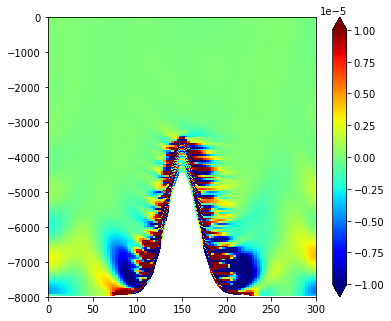

In [49]:
xx = 50
tt = -10
depth = du_03.e[tt,:,:,xx]
data = du_03.u[tt,:,:,xx]

xx = lat
yy = depth[:-1,:]
z_levels = yy.shape[0]
yi = np.linspace(0,8000,z_levels) #Dummy, just for have z_levels
xi, yyi = np.meshgrid(xx, yi) #We repeat the horizontal part of the grid by the number of zlevels

fig  = plt.figure(1, figsize = (6,36))
norm = col.Normalize(vmin=-1e-05,vmax=1e-05)

ax = fig.add_subplot(611)
CS = ax.pcolormesh(xi,yy,data,norm=norm, cmap = cmocean.cm.jet)
plt.colorbar(CS,orientation = 'vertical',extend = 'both')

plt.ylim(ymin=-8000,ymax=0)